## Group09

## Abhishek Mahadevan Raju (1306162), Natarajan Chidambaram (1358111), Priya Sivasubramanian (1378635)

# Question 1: Variational Autoencoder
**Make sure you have read the theoretical assignment, and answered the questions there, before working on this practical assignment.**


In this task, we will implement a Variational Autoencoder (VAE) step by step, using the model and results from the theoretical assignment. Some code is already provided, the task is to fill in the gaps.

### Imports

In [0]:
from keras.layers import Lambda, Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, BatchNormalization
from keras.models import Model, load_model
from keras.losses import binary_crossentropy, mse
from keras.datasets import mnist,fashion_mnist
from keras import backend as K
from keras import metrics

import math
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
cd drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


### Data
We will train a VAE for the MNIST data. This code loads the data, and increases the canvas size to 32x32 by padding zeros. This makes it easier to design convolutional autoencoder architectures with striding or pooling/upsampling.

In [0]:
# MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalise
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# change shape: (n, 28, 28) -> (n, 28, 28, 1)
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.reshape(x_test.shape + (1,))

# pad zeros to obtain canvas size of 32x32, i.e. shape is now (n, 32, 32, 1)
x_train = np.pad(x_train, pad_width=((0, 0), (2, 2), (2, 2), (0, 0)), mode="constant", constant_values=0)
x_test = np.pad(x_test, pad_width=((0, 0), (2, 2), (2, 2), (0, 0)), mode="constant", constant_values=0)

# get height, width, and depth values
height, width, depth = x_train.shape[1:]

11493376/11490434 [==============================] - 0s 0us/step


## Task 1.1: Encoder architecture
**(a)** *Choose and implement a suitable architecture for the encoder. The encoder should have two outputs, which we will interpret as the mean and log variance of the approximate posterior distribution $q(z|x)$ (a Gaussian, as defined in the theoretical assignment). In this task, use a latent space dimension of 2 such that we can easily plot the latent space.*

In [0]:
# network parameters
input_shape = (height, width, depth)
latent_dim = 2

# VAE model = encoder + decoder
# build encoder model
x_in = Input(shape=input_shape, name='encoder_input')

#### INSERT CODE HERE

# conv block 1
h = Conv2D(filters=32, kernel_size=(3, 3), padding="same",
           activation='relu')(x_in)
h = MaxPooling2D(pool_size=(2, 2), padding="same")(h)
h = BatchNormalization()(h)

# conv block 2
h = Conv2D(filters=64, kernel_size=(3, 3), padding="same",
           activation='relu')(h)
h = MaxPooling2D(pool_size=(2, 2), padding="same")(h)
h = BatchNormalization()(h)

# dense layers
h = Flatten()(h)
h = Dense(128, activation="relu")(h)
h = BatchNormalization()(h)
h = Dense(64, activation="relu")(h)
h = BatchNormalization()(h)
# h = Dense(32, activation='relu')(h)
# h = BatchNormalization()(h)

z_mean = Dense(latent_dim, name='z_mean')(h)  # mean parameter of q(z|x)
z_log_var = Dense(latent_dim, name='z_log_var')(h)  # log of variance parameter of q(z|x)

###
# instantiate encoder model
encoder = Model(x_in, [z_mean, z_log_var], name='encoder')
encoder.summary()

W0614 20:08:07.545038 139818318411648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0614 20:08:07.592266 139818318411648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0614 20:08:07.594027 139818318411648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0614 20:08:07.624572 139818318411648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0614 20:08:07.639705 139818318411648 deprecation_wrapp

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 32)   320         encoder_input[0][0]              
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 16, 16, 32)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 16, 16, 32)   128         max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
conv2d_2 (

In [0]:
# Ecoder attempt without any layers

# network parameters
input_shape = (height, width, depth)
latent_dim = 2

# VAE model = encoder + decoder
# build encoder model
x_in = Input(shape=input_shape, name='encoder_input')
h = Flatten()(x_in)
encoded = Dense(256, activation = 'relu')(h)

z_mean = Dense(latent_dim, name='z_mean')(encoded)  # mean parameter of q(z|x)
z_log_var = Dense(latent_dim, name='z_log_var')(encoded)  # log of variance parameter of q(z|x)

###
# instantiate encoder model
encoder = Model(x_in, [z_mean, z_log_var], name='encoder')
encoder.summary()

W0614 12:38:23.864259 139836083386240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0614 12:38:23.894905 139836083386240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0614 12:38:23.909993 139836083386240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 1024)         0           encoder_input[0][0]              
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          262400      flatten_1[0][0]                  
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            514         dense_1[0][0]                    
__________________________________________________________________________________________________
z_log_var 

**(b)** *Motivate your choice of architecture.*

**Answer:**

Different architectures were tried for this task, increasing/decreasing the number of convolution layers, varying their filter size, increasing/decreasing the number of Dense layers and varying the number of neurons in each hidden layer. This architecture was chosen to be the best as it returned some meaningful val_loss values and the loss for the training set was found to be converging. Visual verification of the same too confirmed this. 

The architectures that had too many layers took much time for training and also returned very blurred/confused image as it had too many features and did not concentrate only on the key features. The architectures that had lesser number of layers blacked out certain numbers and gave half numbers (broken numbers) as the reconstructed image as the key features were possibly missing for reconstruction. Few images from these architectures gave numbers in an angles. Among all the other architectures, it is found that this is the best. This model does not take much time for training compared to others and also gives the best possible reconstructed images.

**(c)** *What is the reason to model the logarithm of the variance, instead of the variance (or standard deviation) itself?*

**Answer:**

This is done so as to bring a stability in numerical calculations. We know that sigma ranges between [0,1]. So, to avoid approximation of variance values to zero (for the values that are close to zero), with this log transformation we can increase the range of std numbers from (-inf,0]. However we can apply exponential to this transformation to get back the variance.

## Task 1.2: Decoder architecture
**(a)** *Choose and implement a suitable architecture for the decoder. Input is a sample of latent variables, the output represents the parameters of the generative distribution $p(x|z)$, i.e. the mean of a Gaussian distribution (for continuous data) or Bernoulli distribution (for binary data).*

In [0]:
#Decoder for Encoder with only dense layer

# build decoder model
z_in = Input(shape=(latent_dim,), name='z_in')

#### INSERT CODE HERE
h = Dense(256, activation = 'relu')(z_in)
h = Dense(32*32*1, activation="sigmoid")(h)
dec_out = Reshape((32, 32, 1))(h)

# reverse conv block
# dec_out = Conv2D(filters=1, kernel_size=(3, 3), padding="same",
#                activation='sigmoid')(h)
###
# instantiate decoder model
decoder = Model(z_in, dec_out, name='decoder')
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_in (InputLayer)            (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               768       
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              263168    
_________________________________________________________________
reshape_1 (Reshape)          (None, 32, 32, 1)         0         
Total params: 263,936
Trainable params: 263,936
Non-trainable params: 0
_________________________________________________________________


In [0]:
# build decoder model
z_in = Input(shape=(latent_dim,), name="z_in")

#### INSERT CODE HERE
h = Dense(32, activation="relu")(z_in)
h = BatchNormalization()(h)
h = Dense(64, activation="relu")(z_in)
h = BatchNormalization()(h)
h = Dense(128, activation="relu")(h)
h = BatchNormalization()(h)
h = Dense(8*8*64, activation="relu")(h)
h = Reshape((8, 8, 64))(h)

# reverse conv block 2
h = BatchNormalization()(h)
h = UpSampling2D(size=(2, 2))(h)
h = Conv2D(filters=32, kernel_size=(3, 3), padding="same",
           activation='relu')(h)

# reverse conv block 3
h = BatchNormalization()(h)
h = UpSampling2D(size=(2, 2))(h)
dec_out = Conv2D(filters=1, kernel_size=(3, 3), padding="same",
               activation='sigmoid')(h)
###
# instantiate decoder model
decoder = Model(z_in, dec_out, name="decoder")
decoder.summary()

W0614 20:08:16.761476 139818318411648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_in (InputLayer)            (None, 2)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                192       
_________________________________________________________________
batch_normalization_6 (Batch (None, 64)                256       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_7 (Batch (None, 128)               512       
_________________________________________________________________
dense_6 (Dense)              (None, 4096)              528384    
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 8, 64)          0         
__________

**(b)** *Motivate your choice of architecture.*

**Answer:**

The defaut approach of just reversing the encoder was done here. But the loss was oscillating instead of converging and the numbers were still blurry at some places. Then another extra layer was added to the architecture in the hope of extracting more features and this worked. So this architecture was fixed for this encoder decoder combination and this gave proper reconstructions than any other decoder attempts.

## Load previously trained encoder & decoder
The following code should not be used the first time, if you haven't trained a VAE yet. After training a VAE, you can save your encoder & decoder model. This code can then be used to load these models again, such that you won't need to retrain a new model in each new session.

Note that we only load the separate encoder & decoder model, not the entire VAE model. The reason for this is that the VAE will contain a lambda layer, and Keras can have trouble saving/loading models with lambda layers.

In [0]:
#For local
encoder_path = "vae_encoder_mnist_5.h5"
decoder_path = "vae_decoder_mnist_5.h5"

encoder = load_model(encoder_path)
decoder = load_model(decoder_path)

encoder.summary()
decoder.summary()

x_in = encoder.input
z_mean, z_log_var = encoder.output
latent_dim = int(z_mean.shape[1])

## Task 1.3: Reparametrisation trick
*To implement sampling with the reparametrisation trick, we will define a custom lambda layer. It takes the mean and log variance of $q(z|x)$ as input, and outputs a sample from $q(z|x)$. This is done by first sampling from a standard Gaussian (Normal) distribution, and then applying the proper transformation to obtain a sample from $q(z|x)$ with the given mean and variance. Implement this transformation.*

In [0]:
def sampling(args):
    """Reparametrisation trick by sampling from an isotropic unit Gaussian.

    # Arguments
        args (tensor): mean and log of variance of q(z|x)

    # Returns
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch_dim = K.shape(z_mean)[0]
    z_dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean=0 and std=1.0
    epsilon = K.random_normal(shape=(batch_dim, z_dim))

    #### INSERT CODE HERE
    # mu + sigma * epsilon; z_log_var = log(s^2) ==> log_sigma = 0.5 * log(s^2) = log(s) and sigma = exp(log(s)) = s  #(as it is natural log by default)
    return z_mean + K.exp(0.5 * z_log_var) * epsilon
    ####


# use reparametrisation trick to push the sampling out as input
z = Lambda(sampling, name='z')([z_mean, z_log_var])

# instantiate full VAE model
x_mean = decoder(z)
vae = Model(x_in, x_mean, name='vae')

## Task 1.4: Loss function
*Now we define the loss function, which you have derived in the theoretical part of the assignment. Note: we wish to maximise the ELBO, but Keras formulates training objectives as a loss function to minimise, so the loss function is the negative ELBO:*
$-\mathbb{E}_{q_\phi(z|x)} [\log p_\theta(x|z)] + KL(q_\phi(z|x) || p(z))$.

*We split this into two terms, the reconstruction loss and the KL loss.*


### Reconstruction loss
*We start with the first term: $-\mathbb{E}_{q_\phi(z|x)} [\log p_\theta(x|z)]$.*

*We approximate the expectation with a single Monte Carlo sample (using the reparametrisation trick such that the loss function is differentiable), which we can readily obtain from the sampling layer of our encoder model (output `z`). So all you need to implement is the loss function $-\log p_\theta(x|z_{sample})$. You've derived the formula for this in the theoretical part of the assignment, for both a Bernoulli distribution (for discrete data) and a Gaussian distribution with fixed standard deviation (for continuous data). Implement both versions here. Choose a suitable standard deviation value for the Gaussian.*

### KL loss
*The second term of the loss is the KL Divergence $KL(q_\phi(z|x) || p(z))$, which as we saw has a closed form for our choice of posterior and prior (both Gaussians):
$ \frac{1}{2} \sum_{k=1}^K (m_k^2 + s_k^2 - \log s_k^2 - 1)$ (see the theoretical part of the assignment for explanation of the notations). Implement it here.*


##### Implementation notes:
* Always use functions from the Keras backend (available through `from keras import backend as K`) for Tensor operations in your loss function. This way, Keras can perform automatic differentiation to compute the gradients for training. E.g. `K.sum(), K.square(), K.exp()`. You can use operators such as `+` and `*`, they will automatically convert to Tensor operations.
* Make sure to use `K.flatten(x_in)` and `K.flatten(x_mean)` whenever you need them in your loss functions, don't use `x_in` or `x_mean`. The `(height, width, depth)` structure of the data is only needed for convolutional layers, but not in the loss function.
* Note that the formulas you derived in the theoretical assignment are for a single data point or latent variable. Keras however expects a batch of data points or latent variables, so the first dimension in a Tensor is always the batch dimension. For most operations, broadcasting will automatically make computations operate on each data point in a batch individually, but for operations such as `K.sum` you need to make sure you specify the correct axis.

In [0]:
# reconstruction loss
gen_model = "gaussian"  # "bernoulli" or "gaussian"

x_in_L = K.flatten(x_in)
x_mean_L = K.flatten(x_mean)
sig2 = K.exp(z_log_var)

mu = z_mean

if gen_model == "bernoulli":
    #### insert code here
    reconstruction_loss = -K.sum((x_in_L * K.log(x_mean_L + 1e-5) + (1 - x_in_L) * K.log(1 - x_mean_L + 1e-5)), axis = -1) #binary_crossentropy(x_in_L, x_mean_L)
    ####
elif gen_model == "gaussian":
    #### insert code here
    #dec_std = 1 / math.sqrt(2)
    
    # Here the constant term in the equation (theory part) will be zero upon differentiation, so we have removed it. 
    #Also considering (sigma_d) = 1/sqrt(2), the equation is simplified from ((x_in - x_mean)^2)/(2*sigma_d^2) ===> (x_in - x_mean)^2
    
    reconstruction_loss = K.sum(K.square(x_in_L - x_mean_L), axis = -1)
    ####

# KL loss
#### insert code here
kl_loss = 0.5 * K.sum(-1 - z_log_var + K.square(z_mean) + K.exp(z_log_var), axis = -1)
####

# combine both losses
vae_loss = reconstruction_loss + kl_loss
# we use .add_loss instead of including a loss function in .compile, such that
#     we don't have to supply any "true labels", as training is unsupervised
vae.add_loss(vae_loss)
vae.compile(optimizer='adam', loss = None)
vae.summary()

W0614 20:08:33.051652 139818318411648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 32)   320         encoder_input[0][0]              
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 16, 16, 32)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 16, 16, 32)   128         max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
conv2d_2 (

## Task 1.5: Training & evaluating the model
*Train the model for 50 epochs with batch size 100. Choose whether to use the Bernoulli or Gaussian generative distribution. On Google Colab, go to Edit > Notebook settings and make sure to select "GPU" as hardware accelerator.*

In [0]:
#Rejected
batch_size = 100
epochs = 50

#default
# train the autoencoder
vae.fit(x_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, None))

#images are missing/broken in the corners

In [0]:
#Rejected
#encoder conv 64,128,256 Dense 512,256,64,32
#decoder reverseConv 128,64,1 Dense 32,64,256,512
#arch name:2 #gaussian

batch_size = 100
epochs = 50

vae.fit(x_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, None))

#numbers 9,4 are blurred too much, 1 is slanted, 3,5 is confused, 2,0 is not distinguishable

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 82s 1ms/step - loss: 2501.3430 - val_loss: 1934.7605
Epoch 2/50
60000/60000 [==============================] - 73s 1ms/step - loss: 1854.5442 - val_loss: 6068.5581
Epoch 3/50
60000/60000 [==============================] - 72s 1ms/step - loss: 1847.6417 - val_loss: 1674.0334
Epoch 4/50
60000/60000 [==============================] - 74s 1ms/step - loss: 1671.8058 - val_loss: 1615.7124
Epoch 5/50
60000/60000 [==============================] - 67s 1ms/step - loss: 1617.1625 - val_loss: 1565.4781
Epoch 6/50
60000/60000 [==============================] - 68s 1ms/step - loss: 1585.8882 - val_loss: 1534.8087
Epoch 7/50
60000/60000 [==============================] - 67s 1ms/step - loss: 1555.7568 - val_loss: 1577.3644
Epoch 8/50
60000/60000 [==============================] - 65s 1ms/step - loss: 1537.5995 - val_loss: 1473.5861
Epoch 9/50
60000/60000 [==============================] - 67s 

In [0]:
#Rejected
#encoder conv 64,128,256 Dense 512,256,128,64,32
#decoder reverseConv 128,64,1 Dense 32,64,128,256,512
#arch name:3 #bernoulli

batch_size = 100
epochs = 20

vae.fit(x_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, None))

# 4,9 are blurred too much and 5,3,8 are confused

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 79s 1ms/step - loss: 14336.9287 - val_loss: 14353.8516
Epoch 2/20
60000/60000 [==============================] - 76s 1ms/step - loss: 14276.1992 - val_loss: 14172.3223
Epoch 3/20
60000/60000 [==============================] - 76s 1ms/step - loss: 14054.6338 - val_loss: 14115.6904
Epoch 4/20
60000/60000 [==============================] - 76s 1ms/step - loss: 13959.8662 - val_loss: 13662.5723
Epoch 5/20
60000/60000 [==============================] - 76s 1ms/step - loss: 13843.4189 - val_loss: 14077.0459
Epoch 6/20
60000/60000 [==============================] - 76s 1ms/step - loss: 13761.6641 - val_loss: 13732.4863
Epoch 7/20
60000/60000 [==============================] - 75s 1ms/step - loss: 13759.5615 - val_loss: 13761.7070
Epoch 8/20
60000/60000 [==============================] - 71s 1ms/step - loss: 13754.1797 - val_loss: 13625.2236
Epoch 9/20
60000/60000 [======================

In [0]:
#Rejected
#Arch numb:5  #bernoulli
#Arch: encoder: conv 32,64 Dense 128,64,2
#      Decoder: conv 64,32,1 Dense 2,32,64,128

batch_size = 100
epochs = 50

vae.fit(x_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, None))

#Numbers are blurry and the cluster is not done properly

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 22s 371us/step - loss: 19786.1504 - val_loss: 14838.6201
Epoch 2/50
60000/60000 [==============================] - 19s 314us/step - loss: 14808.9775 - val_loss: 14359.7129
Epoch 3/50
60000/60000 [==============================] - 19s 313us/step - loss: 14413.2598 - val_loss: 14059.1201
Epoch 4/50
60000/60000 [==============================] - 19s 312us/step - loss: 14249.2949 - val_loss: 13947.0928
Epoch 5/50
60000/60000 [==============================] - 19s 311us/step - loss: 14120.5742 - val_loss: 13893.7588
Epoch 6/50
60000/60000 [==============================] - 19s 311us/step - loss: 13971.7578 - val_loss: 13755.0029
Epoch 7/50
60000/60000 [==============================] - 19s 313us/step - loss: 13887.2754 - val_loss: 13653.8340
Epoch 8/50
60000/60000 [==============================] - 19s 312us/step - loss: 13797.8086 - val_loss: 13578.4336
Epoch 9/50
60000/60000 [======

##
Accepted Architecture, working fine with these layers.

In [0]:
# Accepted Architecture, working fine with these layers.
#Arch numb:6  #gaussian
#Arch: encoder: conv 32,64 Dense 128,64,2
#      Decoder: conv 64,32,1 Dense 2,32,64,128

batch_size = 100
epochs = 50

vae.fit(x_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, None))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 15s 257us/step - loss: 4796.2339 - val_loss: 3638.8235
Epoch 2/50
60000/60000 [==============================] - 10s 166us/step - loss: 3637.7278 - val_loss: 4464.8892
Epoch 3/50
60000/60000 [==============================] - 10s 166us/step - loss: 3430.4565 - val_loss: 3760.3091
Epoch 4/50
60000/60000 [==============================] - 10s 165us/step - loss: 3295.2678 - val_loss: 3171.7368
Epoch 5/50
60000/60000 [==============================] - 10s 165us/step - loss: 3215.1404 - val_loss: 3117.8828
Epoch 6/50
60000/60000 [==============================] - 10s 165us/step - loss: 3182.6799 - val_loss: 3051.6790
Epoch 7/50
60000/60000 [==============================] - 10s 164us/step - loss: 3112.0149 - val_loss: 3089.3948
Epoch 8/50
60000/60000 [==============================] - 10s 165us/step - loss: 3072.6318 - val_loss: 2213869019001704024406753280.0000
Epoch 9/50
60000/60000

In [0]:
#Rejected
#Arch numb:7  #gaussian
#Arch: encoder: conv 32,128 Dense 256,32,2
#      Decoder: Dense 2,32,256 conv 128,32,1

batch_size = 100
epochs = 50

vae.fit(x_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, None))

#getting some extra lines/pixels in the number, and the numbers are titled by 45 degs in the visual output

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 29s 478us/step - loss: 2606.4612 - val_loss: 3744.9744
Epoch 2/50
60000/60000 [==============================] - 25s 424us/step - loss: 1896.8912 - val_loss: 1779.8945
Epoch 3/50
60000/60000 [==============================] - 25s 424us/step - loss: 1773.8918 - val_loss: 1696.5403
Epoch 4/50
60000/60000 [==============================] - 25s 422us/step - loss: 1700.3394 - val_loss: 1726.6998
Epoch 5/50
60000/60000 [==============================] - 25s 422us/step - loss: 1655.1578 - val_loss: 229523656278016.0000
Epoch 6/50
60000/60000 [==============================] - 26s 427us/step - loss: 1603.6344 - val_loss: 1605.5710
Epoch 7/50
60000/60000 [==============================] - 26s 433us/step - loss: 1575.1306 - val_loss: 1571.0469
Epoch 8/50
60000/60000 [==============================] - 26s 433us/step - loss: 1554.6720 - val_loss: 1511.5094
Epoch 9/50
60000/60000 [===========

In [0]:
#Rejected
#Arch numb:8  #bernoulli
#Arch: encoder: conv 32,128 Dense 256,32,2
#      Decoder: conv 128,32,1 Dense 2,32,128

batch_size = 100
epochs = 50

vae.fit(x_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, None))

# numbers, 4,9,8 are very blurred in the visual output

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 47s 787us/step - loss: 20821.0391 - val_loss: 15369.2090
Epoch 2/50
60000/60000 [==============================] - 41s 689us/step - loss: 14973.2354 - val_loss: 14627.8691
Epoch 3/50
60000/60000 [==============================] - 37s 617us/step - loss: 14594.0537 - val_loss: 14210.8203
Epoch 4/50
60000/60000 [==============================] - 34s 560us/step - loss: 14318.6846 - val_loss: 14068.4551
Epoch 5/50
60000/60000 [==============================] - 41s 686us/step - loss: 14158.1084 - val_loss: 15622.2959
Epoch 6/50
60000/60000 [==============================] - 37s 618us/step - loss: 14051.3789 - val_loss: 13926.4209
Epoch 7/50
60000/60000 [==============================] - 34s 562us/step - loss: 13993.6133 - val_loss: 13741.3086
Epoch 8/50
60000/60000 [==============================] - 41s 676us/step - loss: 13859.4453 - val_loss: 1911667.6250
Epoch 9/50
60000/60000 [====

In [0]:
#Rejected
#Arch numb:10  #gaussian
#Arch: encoder: Dense 256,2
#      Decoder: Dense 2,256

batch_size = 100
epochs = 50

vae.fit(x_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, None))

#few numbers are half cut in the visual output.

W0614 12:40:49.309300 139836083386240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 87us/step - loss: 2489.5747 - val_loss: 2040.9633
Epoch 2/50
60000/60000 [==============================] - 4s 65us/step - loss: 1963.9509 - val_loss: 1902.9799
Epoch 3/50
60000/60000 [==============================] - 4s 65us/step - loss: 1879.8578 - val_loss: 1844.2634
Epoch 4/50
60000/60000 [==============================] - 4s 65us/step - loss: 1832.4340 - val_loss: 1810.8749
Epoch 5/50
60000/60000 [==============================] - 4s 65us/step - loss: 1797.2446 - val_loss: 1780.0392
Epoch 6/50
60000/60000 [==============================] - 4s 65us/step - loss: 1767.4114 - val_loss: 1755.7500
Epoch 7/50
60000/60000 [==============================] - 4s 65us/step - loss: 1742.9108 - val_loss: 1733.0654
Epoch 8/50
60000/60000 [==============================] - 4s 65us/step - loss: 1723.0991 - val_loss: 1719.7688
Epoch 9/50
60000/60000 [==============================] - 4s 6

Save the trained encoder and decoder for later use, so you don't have to retrain it for every new session:

In [0]:
encoder_path = "vae_encoder_mnist_5.h5"
decoder_path = "vae_decoder_mnist_5.h5"

encoder.save(encoder_path)
decoder.save(decoder_path)

*Use the following functions to generate plots of the latent space (note that they only work for a 2-dimensional latent space).*

*The first plot shows the mean representations in latent space for data points from the test set. Although VAEs are unsupervised, we do have label information for the MNIST data, so we can use this give data points a different colour depending on their label.*

*The second plot takes linearly spaced coordinates in latent space, decodes them into data space representations, and plots them in a grid according to the latent space coordinates. So each of the images are generated, not reconstructed from data.*

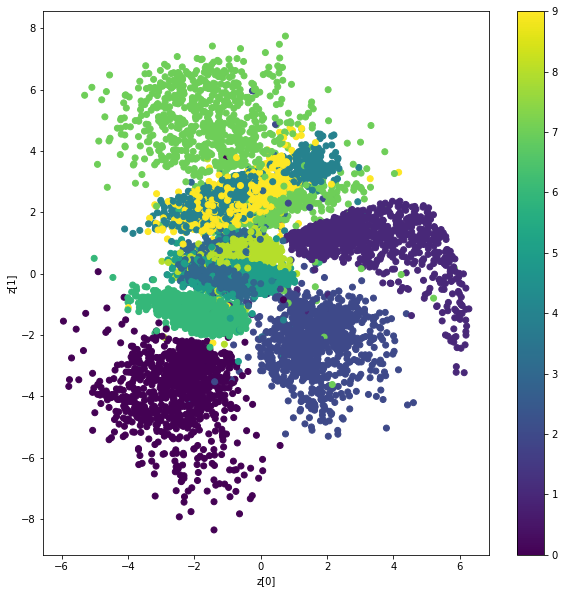

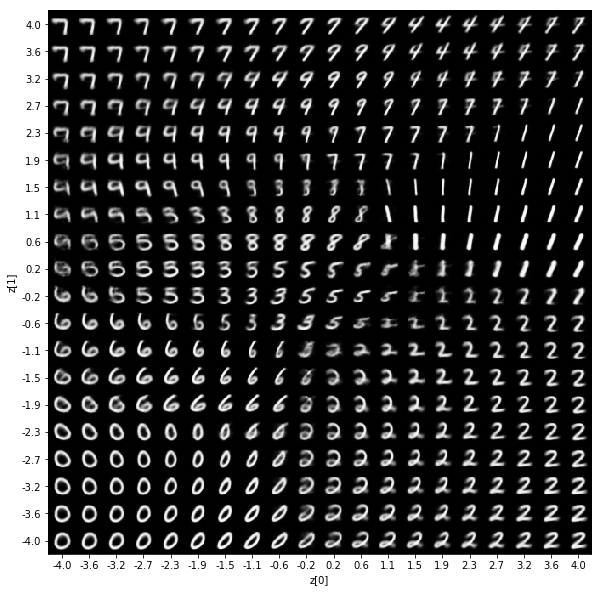

In [0]:
#gaussain
batch_size = 100

def plot_results(encoder, decoder,
                 x_test, y_test,
                 batch_size=128):
    """Plots labels and MNIST digits as function of 2-dim latent vector

    # Arguments
        encoder (keras Model): encoder model
        decoder (keras Model): decoder model
        x_test (np.array): test data
        y_test (np.array): test labels
        batch_size (int): prediction batch size
    """

    # display a 2D plot of the digit classes in the latent space
    z_mean, _ = encoder.predict(x_test,
                                   batch_size=batch_size)
    plt.figure(figsize=(10, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y_test)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()

    # display a 30x30 2D manifold of digits
    n = 20
    digit_size = x_test.shape[1]  # assume square images, i.e. height == width
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-4, 4, n)
    grid_y = np.linspace(-4, 4, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            x_decoded = np.reshape(x_decoded, (x_decoded.shape[0], -1))
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap='Greys_r')
    plt.show()

# plot results
plot_results(encoder, decoder,
             x_test, y_test,
             batch_size=batch_size)

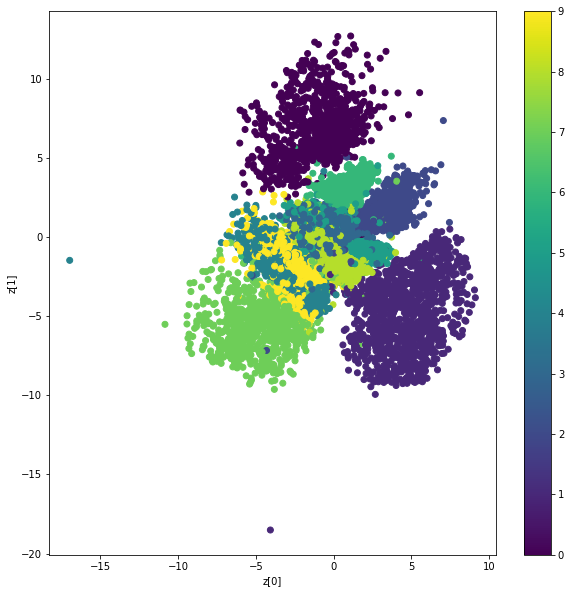

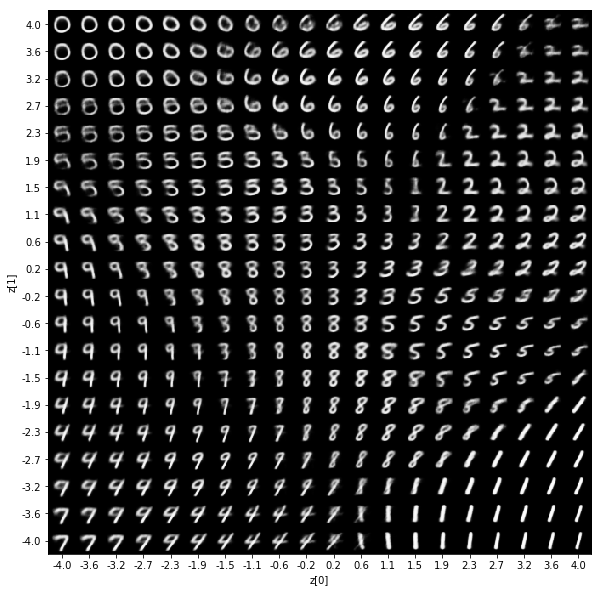

In [0]:
#Rejected
#bernoulli
batch_size = 100

def plot_results(encoder, decoder,
                 x_test, y_test,
                 batch_size=128):
    """Plots labels and MNIST digits as function of 2-dim latent vector

    # Arguments
        encoder (keras Model): encoder model
        decoder (keras Model): decoder model
        x_test (np.array): test data
        y_test (np.array): test labels
        batch_size (int): prediction batch size
    """

    # display a 2D plot of the digit classes in the latent space
    z_mean, _ = encoder.predict(x_test,
                                   batch_size=batch_size)
    plt.figure(figsize=(10, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y_test)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()

    # display a 30x30 2D manifold of digits
    n = 20
    digit_size = x_test.shape[1]  # assume square images, i.e. height == width
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-4, 4, n)
    grid_y = np.linspace(-4, 4, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            x_decoded = np.reshape(x_decoded, (x_decoded.shape[0], -1))
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap='Greys_r')
    plt.show()

# plot results
plot_results(encoder, decoder,
             x_test, y_test,
             batch_size=batch_size)

*These latent space plots can give an insight into the (latent) representations that are learned by the VAE. Evaluate what you see:*

**(a)** *Did you successfully train a generative model for this data? Motivate your answer.*



**Answer:**

A generative model was trained succesfully with the latent dimension. From the cluster graph we can see that different numbers take different cluster and the cluster of numbers that have similar structure are close to each other. This was verified by taking some examples from the test set and is displayed. Here there are no labels given in input and it is not verified with a label but with the image itself. So the model learnt from the input image directly and reconstructed the numbers successfully for the test set. This says that the model has learnt properly and is reconstructing properly.

**(b)** *Discuss how the latent space is populated by the test data. What happens in "gaps" in the latent space? I.e. areas in latent space near the origin (so with high prior likelihood) but without any data points being mapped to them. What do images generated from such latent points look like?*

**Answer:**

The latent space is densly populated and the numbers having similar structures are close to each other based on how much similar they are. The gaps in latent space will be used to generate the numbers that are not seen by the model. The gaps in latent space will also be used for generating the unseen image. This will be used for generation in the next question. 

As the data in latent space is populated like a sphere around the origin, the most likely number/very perfect number of the cluster will be placed near the origin (like center of mass) and the points present on the boundary of the sphere are outliers . Thus images from the latent points on the origin will be of perfect recontructed image.

# Question 2: FashionMNIST VAE, semi-supervised learning

In this question, we will investigate the usefulness of VAE latent representations in semi-supervised learning. Since the VAE is an unsupervised method, we don't need any labels to learn latent representations. Often, it is easy to obtain a lot of unlabelled data, but labelling this data is expensive. Thus, methods that can leverage unsupervised training to learn a supervised goal (such as classification) may be very powerful. This is the idea behind semi-supervised learning.

You will evaluate this on the FashionMNIST dataset. Although all labels are available for this dataset, we can "hide" some labels from a model, simply by not using all of them.

Besides representations learned with a VAE, you will also compare with another representation learning method: a denoising autoencoder.

## Task 2.1: Unsupervised training
**(a)** *Train two representation learning methods on the FashionMNIST dataset; a variational autoencoder (VAE) and a denoising autoencoder. Choose a suitable architecture, and encoding/latent dimension (hint: for good results a dimension of 2 will likely be too small). For fairness, use similar architectures for each of the models.*

*Use each of the models to obtain encoded representations for the full dataset (training and test set).*

In [0]:
img_shape = (height_2, width_2, depth_2)    
batch_size = 16
latent_dim = 10  # Number of latent dimension parameters

# Encoder architecture: Input -> Conv2D*4 -> Flatten -> Dense
input_img = Input(shape=img_shape, name='encoder_input')

# conv block 1
vae_enc_layer = Conv2D(filters=32, kernel_size=(3, 3), padding="same",
           activation='relu')(input_img)
vae_enc_layer = MaxPooling2D(pool_size=(2, 2), padding="same")(vae_enc_layer)
vae_enc_layer = BatchNormalization()(vae_enc_layer)

# conv block 2
vae_enc_layer = Conv2D(filters=64, kernel_size=(3, 3), padding="same",
           activation='relu')(vae_enc_layer)
vae_enc_layer = MaxPooling2D(pool_size=(2, 2), padding="same")(vae_enc_layer)
vae_enc_layer = BatchNormalization()(vae_enc_layer)

shape_before_flattening = K.int_shape(vae_enc_layer)

vae_enc_layer = Flatten()(vae_enc_layer)
vae_enc_layer = Dense(128, activation="relu")(vae_enc_layer)
vae_enc_layer = BatchNormalization()(vae_enc_layer)
vae_enc_layer = Dense(64, activation="relu")(vae_enc_layer)
vae_enc_layer = BatchNormalization()(vae_enc_layer)
vae_enc_layer = Dense(32, activation='relu')(vae_enc_layer)

# Check if needed and comment
vae_enc_layer = BatchNormalization()(vae_enc_layer)

# Two outputs, latent mean and (log)variance
z_mu = Dense(latent_dim, name='z_mean')(vae_enc_layer)
z_log_var = Dense(latent_dim, name='z_log_var')(vae_enc_layer)

###
# instantiate encoder model
encoder_vae = Model(input_img, [z_mu, z_log_var], name='encoder_vae')
encoder_vae.summary()


W0614 18:22:28.411808 139761210075008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0614 18:22:28.435773 139761210075008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0614 18:22:28.437110 139761210075008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0614 18:22:28.454414 139761210075008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0614 18:22:28.470714 139761210075008 deprecation_wrapp

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   320         encoder_input[0][0]              
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 14, 14, 32)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 14, 14, 32)   128         max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
conv2d_2 (

In [0]:
# sampling function
def sampling(args):
    z_mu, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mu)[0], latent_dim),
                              mean=0., stddev=1.)
    return z_mu + K.exp(0.5 * z_log_var) * epsilon

# sample vector from the latent distribution


In [0]:
# decoder takes the latent distribution sample as input
z = Lambda(sampling)([z_mu, z_log_var])

decoder_input = Input(K.int_shape(z)[1:])

# z_log_sigma
# Expand to 784 total pixels
# x = Dense(np.prod(shape_before_flattening[1:]), activation='relu')(decoder_input)

# reshape
# x = Reshape(shape_before_flattening[1:])(x)

# use Conv2DTranspose to reverse the conv layers from the encoder
# x = Conv2DTranspose(32, 3,padding='same', activation='relu', strides=(2, 2))(x)
# x = Conv2D(1, 3, padding='same', activation='sigmoid')(x)

vae_dec_layer = Dense(32, activation="relu")(decoder_input)
vae_dec_layer = BatchNormalization()(vae_dec_layer)
vae_dec_layer = Dense(64, activation="relu")(vae_dec_layer)
vae_dec_layer = BatchNormalization()(vae_dec_layer)
vae_dec_layer = Dense(128, activation="relu")(vae_dec_layer)
vae_dec_layer = BatchNormalization()(vae_dec_layer)
# h = Dense(8*8*64, activation="relu")(h)

vae_dec_layer = Dense(np.prod(shape_before_flattening[1:]), activation='relu')(vae_dec_layer)
# h = Reshape((8, 8, 64))(h)
vae_dec_layer = Reshape(shape_before_flattening[1:])(vae_dec_layer)

# reverse conv block 2
vae_dec_layer = BatchNormalization()(vae_dec_layer)
vae_dec_layer = UpSampling2D(size=(2, 2))(vae_dec_layer)
vae_dec_layer = Conv2D(filters=32, kernel_size=(3, 3), padding="same",
           activation='relu')(vae_dec_layer)

# reverse conv block 3
vae_dec_layer = BatchNormalization()(vae_dec_layer)
vae_dec_layer = UpSampling2D(size=(2, 2))(vae_dec_layer)
dec_out = Conv2D(filters=1, kernel_size=(3, 3), padding="same",
               activation='sigmoid')(vae_dec_layer)


# decoder model statement
decoder_vae = Model(decoder_input, dec_out, name='decoder')

# apply the decoder to the sample from the latent distribution
z_decoded = decoder_vae(z)

# instantiate decoder model

# decoder = Model(decoder_input, dec_out, name='decoder')
decoder_vae.summary()


W0614 18:22:36.355274 139761210075008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                352       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32)                128       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
batch_normalization_7 (Batch (None, 64)                256       
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_8 (Batch (None, 128)               512       
__________

In [0]:
# Loss calculation

x_in_L = K.flatten(input_img)
x_mean_L = K.flatten(z_decoded)
sig2 = K.exp(z_log_var)
mu = z_mu

reconstruction_loss = K.sum(K.square(x_in_L - x_mean_L), axis = -1) 

#mse(x_in_L, x_mean_L) -0.5 * (K.log(2 * math.pi * sig2))


# KL loss
#### insert code here
kl_loss = 0.5 * K.sum(-1 - z_log_var + K.square(z_mu) + K.exp(z_log_var), axis = -1)
####

# combine both losses
vae_loss = reconstruction_loss + kl_loss

In [0]:
# VAE model statement
vae = Model(input_img, z_decoded)

vae.add_loss(vae_loss)
vae.compile(optimizer='adadelta', loss=None)
vae.summary()

W0614 18:22:44.015938 139761210075008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   320         encoder_input[0][0]              
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 14, 14, 32)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 14, 14, 32)   128         max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
conv2d_2 (

In [0]:
batch_size = 100
epochs = 50

# train the autoencoder
vae.fit(x_train_q2,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test_q2, None))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 16s 271us/step - loss: 2714.4312 - val_loss: 2203.2791
Epoch 2/50
60000/60000 [==============================] - 12s 202us/step - loss: 1760.3695 - val_loss: 1913.9276
Epoch 3/50
60000/60000 [==============================] - 12s 201us/step - loss: 1543.0258 - val_loss: 1424.1407
Epoch 4/50
60000/60000 [==============================] - 12s 200us/step - loss: 1428.0781 - val_loss: 1418.5562
Epoch 5/50
60000/60000 [==============================] - 12s 198us/step - loss: 1354.1998 - val_loss: 1312.5464
Epoch 6/50
60000/60000 [==============================] - 12s 197us/step - loss: 1303.8326 - val_loss: 1198.2589
Epoch 7/50
60000/60000 [==============================] - 12s 197us/step - loss: 1269.0598 - val_loss: 1177.5173
Epoch 8/50
60000/60000 [==============================] - 12s 198us/step - loss: 1236.8185 - val_loss: 1187.6952
Epoch 9/50
60000/60000 [======================

**(b)** *Motivate your architectural choices.*

**Answer:**

Different architectures were tried for this task too same as that were done for question 1. But the architecture used in Question 1 seemed to be working the best and that was retained as such. This architecture was chosen to be the best as it returned some meaningful recontructed images. Visual verification of the same too confirmed this. 

The architectures that had too many layers took much time for training and also returned very blurred/confused image ( shoe in the place of sandals). This is due to having more features that are considered to be meaningful and the architectures that had lesser number of layers gave noisy image. Among all the other architectures, it is found that this is the best. This model does not take much time for training gives lesser loss values and the visual verification too confirms this.


Regarding the Denoising Autoencoder, we have almost the same architecture with a key difference. The DAE is a convolution-based model, and we do not generate the input to the decoder based on a probabilistic approach, and thus, we connect the output of the encoder directly to the input of the decoder. The encoder is deterministic in this way. The model is also trained to denoise by keeping the target as the original image and by feeding it the corresponding image with noise. This enables the model to train itself to identify underlying latent representations, which are robust to noise, a feature that is highly useful in real-world use cases.

The model trains with a binary-crossentropy loss, which becomes quite low immediately. The images that are generated are reasonably representative of the original image, and are represented in the results below.

##DAE

1


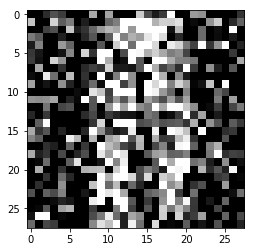

In [0]:
(x_train_dae, y_train_dae), (x_test_dae, y_test_dae) = fashion_mnist.load_data()
# change shape: (n, 28, 28) -> (n, 28, 28, 1)

x_train_dae= x_train_dae.astype("float32")/255
x_test_dae= x_test_dae.astype("float32")/255

img_index_dae_test = 16
plt.imshow(x_train_dae[img_index_dae_test],cmap='gray')
print(y_train_dae[img_index_dae_test])

noise_factor = 0.5

x_train_dae = x_train_dae + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_dae.shape)
x_test_dae = x_test_dae + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_dae.shape)
x_train_dae = np.clip(x_train_dae, 0., 1.)
x_test_dae = np.clip(x_test_dae, 0., 1.)


plt.imshow(x_train_dae[img_index_dae_test],cmap='gray')

x_train_dae = x_train_dae.reshape(x_train_dae.shape + (1,))
x_test_dae = x_test_dae.reshape(x_test_dae.shape + (1,))

height_dae, width_dae, depth_dae= x_train_dae.shape[1:]

In [0]:
img_shape = (height_2, width_2, depth_2)    
batch_size = 16
latent_dim = 10  # Number of latent dimension parameters

# Encoder architecture: Input -> Conv2D*4 -> Flatten -> Dense
input_img_dae = Input(shape=img_shape)

# layer = Conv2D(32, 3,
#                   padding='same', 
#                   activation='relu')(input_img)
# layer = Conv2D(64, 3,
#                   padding='same', 
#                   activation='relu',
#                   strides=(2, 2))(layer)
# layer = Conv2D(64, 3,
#                   padding='same', 
#                   activation='relu')(layer)
# layer = Conv2D(64, 3,
#                   padding='same', 
#                   activation='relu')(layer)


dae_enc_layer = Conv2D(filters=32, kernel_size=(3, 3), padding="same",
           activation='relu')(input_img_dae)
dae_enc_layer = MaxPooling2D(pool_size=(2, 2), padding="same")(dae_enc_layer)
dae_enc_layer = BatchNormalization()(dae_enc_layer)

# conv block 2
dae_enc_layer = Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation='relu')(dae_enc_layer)
dae_enc_layer = MaxPooling2D(pool_size=(2, 2), padding="same")(dae_enc_layer)
dae_enc_layer = BatchNormalization()(dae_enc_layer)

shape_before_flattening_dae = K.int_shape(dae_enc_layer)

dae_enc_layer = Flatten()(dae_enc_layer)
dae_enc_layer = Dense(128, activation="relu")(dae_enc_layer)
dae_enc_layer = BatchNormalization()(dae_enc_layer)
dae_enc_layer = Dense(64, activation="relu")(dae_enc_layer)
dae_enc_layer = BatchNormalization()(dae_enc_layer)
dae_enc_layer = Dense(32, activation='relu')(dae_enc_layer)

# Check if needed and comment
dae_enc_layer = BatchNormalization()(dae_enc_layer)

# need to know the shape of the network here for the decoder
# shape_before_flattening_dae = K.int_shape(layer)
# print(shape_before_flattening_dae)
# layer = Flatten()(layer)
# layer = Dense(32, activation='relu')(layer)
# print(layer.shape)
# Two outputs, latent mean and (log)variance
# z_mu = Dense(latent_dim)(x)
# z_log_sigma = Dense(latent_dim)(x)

encoder_dae = Model(input_img_dae, dae_enc_layer, name='encoder_dae')
encoder_dae.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 7, 7, 64)          256       
__________

In [0]:
print(shape_before_flattening_dae)

(None, 7, 7, 64)


In [0]:
from keras.layers import Conv2DTranspose

# decoder takes the latent distribution sample as input
# decoder_input = Input(layer)
decoder_input_dae = Input(shape=(32,))

dae_dec_layer = Dense(32, activation="relu")(decoder_input_dae)
dae_dec_layer = BatchNormalization()(dae_dec_layer)
dae_dec_layer = Dense(64, activation="relu")(dae_dec_layer)
dae_dec_layer = BatchNormalization()(dae_dec_layer)
dae_dec_layer = Dense(128, activation="relu")(dae_dec_layer)
dae_dec_layer = BatchNormalization()(dae_dec_layer)
# h = Dense(8*8*64, activation="relu")(h)

dae_dec_layer = Dense(np.prod(shape_before_flattening[1:]), activation='relu')(dae_dec_layer)
# h = Reshape((8, 8, 64))(h)
dae_dec_layer = Reshape(shape_before_flattening[1:])(dae_dec_layer)

# reverse conv block 2
dae_dec_layer = BatchNormalization()(dae_dec_layer)
dae_dec_layer = UpSampling2D(size=(2, 2))(dae_dec_layer)
dae_dec_layer = Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation='relu')(dae_dec_layer)

# reverse conv block 3
dae_dec_layer = BatchNormalization()(dae_dec_layer)
dae_dec_layer = UpSampling2D(size=(2, 2))(dae_dec_layer)
dec_out_dae = Conv2D(filters=1, kernel_size=(3, 3), padding="same",
               activation='sigmoid')(dae_dec_layer)

# decoder model statement
decoder_dae = Model(decoder_input_dae, dec_out_dae, name='decoder_dae')

# apply the decoder to the sample from the latent distribution
z_decoded_dae = decoder_dae(dae_enc_layer)

# instantiate decoder model

# decoder = Model(decoder_input, dec_out, name='decoder')
decoder_dae.summary()

# # Expand to 784 total pixels
# layer_d = Dense(np.prod(shape_before_flattening_dae[1:]), activation='relu')(decoder_input)

# # reshape
# layer_d = Reshape(shape_before_flattening_dae[1:])(layer_d)

# # use Conv2DTranspose to reverse the conv layers from the encoder
# layer_d = Conv2DTranspose(32, 3,padding='same', activation='relu', strides=(2, 2))(layer_d)
# layer_d = Conv2D(1, 3, padding='same', activation='sigmoid')(layer_d)

# # decoder model statement
# decoder_dae = Model(decoder_input, layer_d)

# # apply the decoder to the sample from the latent distribution
# z_decoded_dae = decoder_dae(layer)

# decoder_dae.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
batch_normalization_16 (Batc (None, 32)                128       
_________________________________________________________________
dense_12 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_17 (Batc (None, 64)                256       
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_18 (Batc (None, 128)               512       
__________

In [0]:
# DAE model statement
dae = Model(input_img_dae, z_decoded_dae)
dae.compile(optimizer='adam', loss='binary_crossentropy')
dae.summary()

W0614 18:35:47.302369 139761210075008 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 7, 7, 64)          256       
__________

In [0]:
(x_train_original, y_train_original), (x_test_original, y_test_original) = fashion_mnist.load_data()

x_train_original= x_train_original.astype("float32")/255
x_test_original= x_test_original.astype("float32")/255

x_train_original = x_train_original.reshape(x_train_original.shape + (1,))
x_test_original = x_test_original.reshape(x_test_original.shape + (1,))

height_original, width_original, depth_original= x_train_original.shape[1:]

In [0]:
batch_size = 100
epochs = 50

# train the autoencoder
dae.fit(x_train_dae,y = x_train_original,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test_dae, x_test_original))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 14s 231us/step - loss: 0.3426 - val_loss: 0.3129
Epoch 2/50
60000/60000 [==============================] - 11s 187us/step - loss: 0.3081 - val_loss: 0.3068
Epoch 3/50
60000/60000 [==============================] - 11s 187us/step - loss: 0.3027 - val_loss: 0.3023
Epoch 4/50
60000/60000 [==============================] - 11s 186us/step - loss: 0.2997 - val_loss: 0.2990
Epoch 5/50
60000/60000 [==============================] - 11s 185us/step - loss: 0.2972 - val_loss: 0.2977
Epoch 6/50
60000/60000 [==============================] - 11s 185us/step - loss: 0.2957 - val_loss: 0.2956
Epoch 7/50
60000/60000 [==============================] - 11s 185us/step - loss: 0.2942 - val_loss: 0.2950
Epoch 8/50
60000/60000 [==============================] - 11s 188us/step - loss: 0.2929 - val_loss: 0.2941
Epoch 9/50
60000/60000 [==============================] - 11s 187us/step - loss: 0.2917 - val_

## Task 2.2: Qualitative evaluation
Plotting the population of the latent space only works for a 2-dimensional latent space. For higher dimensions, we need different ways to qualitatively evaluate the models.

**(a)** *Reconstruct some images from the test set with both the VAE and DAE. Plot the reconstructions alongside the original images. Briefly discuss the results.*

**(b)** *The VAE is a generative model; generate some images with the VAE and visualise them. Also try to generate images with the DAE (even though it is not intended as a generative model) and visualise them. Discuss the results, in particular the difference between VAE and DAE.*

10000


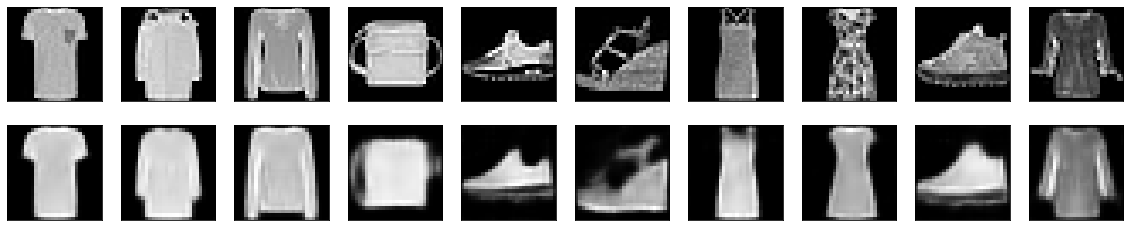

In [0]:
# A -- Reconstructed Images

# Reconstructed Images from VAE

n = 10  # number of images to plot
print(len(x_test_q2))
indices = np.random.choice(len(x_test_q2), size=n, replace=False)
test_imgs = x_test_q2[indices]
# print(indices)
reconstr_imgs = vae.predict(test_imgs)

diff = test_imgs[0].reshape(28,28) - reconstr_imgs[0].reshape(28,28)

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstr_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

10000
[2884 5858 8480 4061 3261 2373 4145 1547 8583 5136]


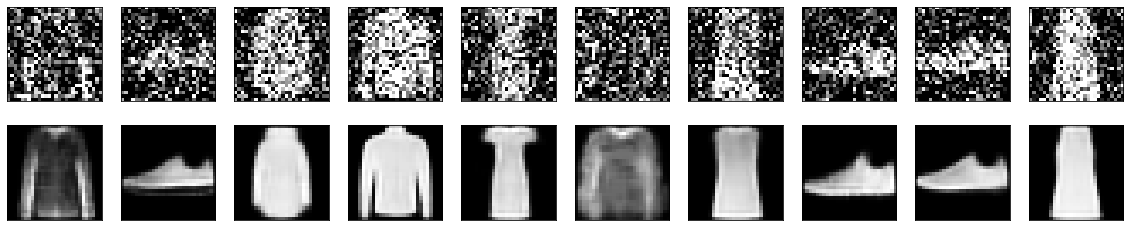

In [0]:
# Reconstructed image from DAE

n = 10  # number of images to plot
print(len(x_test_dae))
indices = np.random.choice(len(x_test_dae), size=n, replace=False)
test_imgs = x_test_dae[indices]
print(indices)
reconstr_imgs = dae.predict(test_imgs)

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstr_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

The reconstructions that are made from the VAE and DAE are satisactory. The VAE manages to recreate the overall shape of the objects with reasonable accuracy. However, the texture and internal details are not recreated. This is because the VAE architecture consists of a probabilistic model, and each reconstruction of the same image is not identical to the previous one. The loss function is identical from the one used in the prvious question. 

The DAE is entirely a convolutional based model, and is able to reconstruct most of the details from terribly noisy data. This model trains with much lesser loss, and runs with the standard binary cross-entropy loss function.

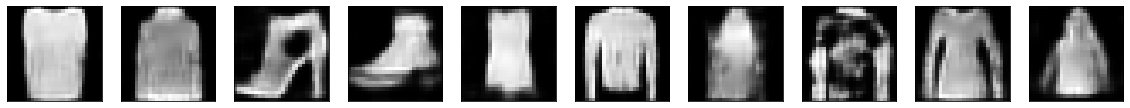

In [0]:
# B -- Generated Images

# Generated Images from VAE

n = 10  # number of images to plot

inputs_to_vae_generator = np.random.randn(n,10)
reconstr_imgs = decoder_vae.predict(inputs_to_vae_generator)

plt.figure(figsize=(20, 4))
for i in range(n):
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstr_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

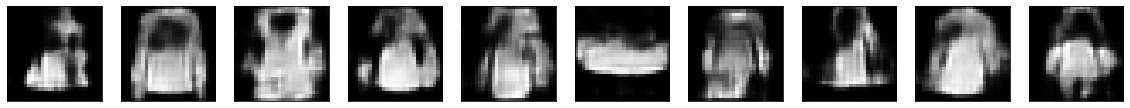

In [0]:
# B -- Generated Images

# Generated Images from DAE

n = 10  # number of images to plot

inputs_to_dae_generator = np.random.randn(n,32)
reconstr_imgs_dae = decoder_dae.predict(inputs_to_dae_generator)

plt.figure(figsize=(20, 4))
for i in range(n):
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstr_imgs_dae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

We find that the data generated from the VAE is able to generate images that are a mix between the various pre-existing objects. Sampling from the standard normal distribution, we are able to obtain quite reasonably clear shapes, and this is indicative of the generative ability of the model.

For the DAE, we input completely random data, and it generalizes the lack of any latent features into a form that is most represented by what appears to be a hoodie. There are also some observable features - the center is almost always filled, indicating that this happens for every input, regardless of the input. The shapes are not clear though, and do not resemble any clear object. The DAE thus does not generate any usable images from completely random data.

## Task 2.3: Semi-supervised learning
*Perform a thorough evaluation of semi-supervised learning for representations learned with your variational and denoising autoencoders.*

*Guidelines:*
* For various suitable values of $l$, randomly select $l$ instances from the training dataset, these will represent your labelled data and are the only data points that may be used for supervised learning. Make sure to include $l=60000$ (i.e. the entire dataset).
* For each value of $l$, train a few off-the-shelf methods from scikit-learn (e.g. random forest, SVM) as well as a simple multilayer perception (MLP) on representations from both the VAE and DAE, using only the $l$ available labels.
* For each value of $l$, also train an MLP on the original image data, using only the $l$ available labels.
* Visualise your results in a clear way, and report your conclusions. Was it beneficial to use unlabelled data as well as labelled data? Which representations worked best?

In [0]:
# scikit-learn imports

from sklearn.utils import shuffle
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier

In [0]:
def group(a, b):
    # Get argsort indices, to be used to sort a and b in the next steps
    sidx = b.argsort(kind='mergesort')
    a_sorted = a[sidx]
    b_sorted = b[sidx]

    # Get the group limit indices (start, stop of groups)
    cut_idx = np.flatnonzero(np.r_[True,b_sorted[1:] != b_sorted[:-1],True])

    # Create cut indices for all unique IDs in b
    n = b_sorted[-1]+2
    cut_idxe = np.full(n, cut_idx[-1], dtype=int)

    insert_idx = b_sorted[cut_idx[:-1]]
    cut_idxe[insert_idx] = cut_idx[:-1]
    cut_idxe = np.minimum.accumulate(cut_idxe[::-1])[::-1]

    # Split input array with those start, stop ones
    out = [a_sorted[i:j] for i,j in zip(cut_idxe[:-1],cut_idxe[1:])]
    return np.array(out)

(60000, 28, 28)
(60000,)
(10000,)
[19377  5459  5457 ... 28190 27302     0]
[ 764 7831 2264 ... 3894 3823    0]
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10, 6000, 28, 28, 1)
(10, 1000, 28, 28, 1)
(60000,)
(10000,)
Label:  Trouser


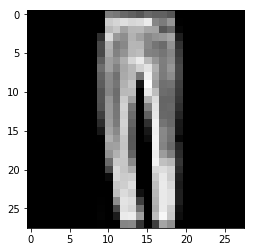

In [0]:
#### insert code here
(x_train_semi, y_train_semi), (x_test_semi, y_test_semi) = fashion_mnist.load_data()

labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

print(x_train_semi.shape)
y_train_semi = y_train_semi.flatten()
y_test_semi = y_test_semi.flatten()
print(y_train_semi.shape)
print(y_test_semi.shape)
indexes_train = y_train_semi.argsort()
indexes_test = y_test_semi.argsort()
print(indexes_train)
print(indexes_test)

x_train_semi= x_train_semi.astype("float32")/255
x_test_semi= x_test_semi.astype("float32")/255

x_train_semi = x_train_semi.reshape(x_train_semi.shape + (1,))
x_test_semi = x_test_semi.reshape(x_test_semi.shape + (1,))

x_train_sort = x_train_semi[indexes_train]
# y_train_sort = y_train_semi[indexes_train]
y_train_sort = np.sort(y_train_semi)

x_test_sort = x_test_semi[indexes_test]
y_test_sort = np.sort(y_test_semi)
# y_test_sort = y_test_semi[indexes_test]

print(x_train_sort.shape)
print(x_test_sort.shape)
x_train_shape = group(x_train_sort, y_train_sort)
x_test_shape = group(x_test_sort, y_test_sort)

print(x_train_shape.shape)
print(x_test_shape.shape)
print(y_train_sort.shape)
print(y_test_sort.shape)

x_train_semi_final = x_train_shape
x_test_semi_final = x_test_shape
y_train_semi_final = y_train_sort
y_test_semi_final = y_test_sort


print('Label: ', labels[y_test_semi_final[1000]])
plt.imshow(x_test_semi_final[1][999].reshape(28, 28))


In [0]:
l_values = [10000, 20000, 30000, 40000, 50000, 60000]
l_values_temp = [10000, 20000]

In [0]:
# Get number of elements per block

# Generating values to the array
# np.full((2, 2), 10)

# x_train_semi_final, x_test_semi_final, y_train_semi_final, y_test_semi_final
no_of_l = len(l_values)
x_train_original_semi = [None] * no_of_l
x_test_original_semi =[None] * no_of_l
x_train_representations_vae = [None] * no_of_l
x_test_representations_vae = [None] * no_of_l
x_train_representations_dae = [None] * no_of_l
x_test_representations_dae = [None] * no_of_l
y_train_semi_learning = [None] * no_of_l
y_test_semi_learning = [None] * no_of_l

# Creating large-scale datasets per item in the data. Need to shuffle X, not Y. Will use np.full for labels, since it's easier, need to shuffle the whole thing.

for index, l in enumerate(l_values):
    parts_from_each_label = l / 10 # Number of classes
    #     print(parts_from_each_label)
    # Data per subset of data per l    
    for label, ind_test_label_images in enumerate(x_test_semi_final):
        y_temp_fixing = np.full(1000, label)
        if x_test_original_semi[index] is None:
            x_test_original_semi[index] = ind_test_label_images
        else: 
            x_test_original_semi[index] = np.concatenate((x_test_original_semi[index], ind_test_label_images), axis = 0)
        
        # DAE encodings, has 1000 * 32, so works well too. Must convert at end        
        if x_test_representations_dae[index] is None:
            x_test_representations_dae[index] = encoder_dae.predict(ind_test_label_images)
        else: 
            x_test_representations_dae[index] = np.concatenate((x_test_representations_dae[index], encoder_dae.predict(ind_test_label_images)), axis = 0)
        
        # VAE encodings are special unfortunately, has 2 * 1000 * 10, so must concatenate too. Must convert at end to ndarray
        encoded_vae_semi_values = encoder_vae.predict(ind_test_label_images)
#         np.concatenate((d[0], d[1]), axis = 1)
        encoded_vae_semi_values_final = np.concatenate((encoded_vae_semi_values[0], encoded_vae_semi_values[1]), axis = 1)
#         np.append(encoded_vae_semi_values[0], encoded_vae_semi_values[1])
        
        if x_test_representations_vae[index] is None:
            x_test_representations_vae[index] = encoded_vae_semi_values_final
        else: 
            x_test_representations_vae[index] = np.concatenate((x_test_representations_vae[index], encoded_vae_semi_values_final), axis = 0)    
        
        if y_test_semi_learning[index] is None:
            y_test_semi_learning[index] = y_temp_fixing
        else: 
            y_test_semi_learning[index] = np.concatenate((y_test_semi_learning[index], y_temp_fixing), axis = 0)
    
    for label, ind_label_images in enumerate(x_train_semi_final):
        # print(ind_label_images.shape)
        # print(label)
        
        x_temp_fixing = shuffle(ind_label_images)[:int(parts_from_each_label)]
        y_temp_fixing = np.full(int(parts_from_each_label), label)
        # This is the data for each l         
        
        # Original image list, works well. Will convert to ndarray later       
        if x_train_original_semi[index] is None:
            x_train_original_semi[index] = x_temp_fixing
        else: 
            x_train_original_semi[index] = np.concatenate((x_train_original_semi[index], x_temp_fixing), axis = 0)
        
        # DAE encodings, has 1000 * 32, so works well too. Must convert at end        
        if x_train_representations_dae[index] is None:
            x_train_representations_dae[index] = encoder_dae.predict(x_temp_fixing)
        else: 
            x_train_representations_dae[index] = np.concatenate((x_train_representations_dae[index], encoder_dae.predict(x_temp_fixing)), axis = 0)
        
        # VAE encodings are special unfortunately, has 2 * 1000 * 10, so must concatenate too. Must convert at end to ndarray
        encoded_vae_semi_values = encoder_vae.predict(x_temp_fixing)
#         np.concatenate((d[0], d[1]), axis = 1)
        encoded_vae_semi_values_final = np.concatenate((encoded_vae_semi_values[0], encoded_vae_semi_values[1]), axis = 1)
#         np.append(encoded_vae_semi_values[0], encoded_vae_semi_values[1])
        
        if x_train_representations_vae[index] is None:
            x_train_representations_vae[index] = encoded_vae_semi_values_final
        else: 
            x_train_representations_vae[index] = np.concatenate((x_train_representations_vae[index], encoded_vae_semi_values_final), axis = 0)    
        
        if y_train_semi_learning[index] is None:
            y_train_semi_learning[index] = y_temp_fixing
        else: 
            y_train_semi_learning[index] = np.concatenate((y_train_semi_learning[index], y_temp_fixing), axis = 0)    
        
print(len(x_train_original_semi))
print(len(x_train_original_semi[0]))




print(len(x_train_representations_vae))
# print(x_train_representations_vae[0].shape)
print(len(x_train_representations_dae))
# print(x_train_representations_dae[0].shape)
print(len(y_train_semi_learning))
# print(y_train_semi_learning[0].shape)

2
10000
2
2
2


In [0]:
# SVM part, will need to execute per l_value

def process_svm(x_train, y_train, x_test, y_test):

    #Create a svm Classifier
    clf = svm.SVC(kernel='linear') # Linear Kernel

    #Train the model using the training sets
    clf.fit(x_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(x_test)
    acc = metrics.accuracy_score(y_test, y_pred)
#     print("Accuracy:",acc)
    return acc
#     print("Precision:",metrics.precision_score(y_test, y_pred))


In [0]:
for i,l in enumerate(l_values):
#     print(i)
#     print(len(x_train_original_semi[i]))
#     print(len(x_train_representations_vae[i]))
#     print(len(x_train_representations_dae[i]))
#     print(len(y_train_semi_learning[i]))
#     print(len(x_test_original_semi[i]))
#     print(len(x_test_representations_dae[i]))
#     print(len(x_test_representations_vae[i]))
#     print(len(y_test_semi_learning[i]))
    
    print("Accuracy for SVM for VAE on l = ", l)
    print("-->",process_svm(x_train_representations_vae[i], y_train_semi_learning[i],x_test_representations_vae[i], y_test_semi_learning[i]))
    print("--------------------")
    print("Accuracy for SVM for DAE on l = ", l)
    print("-->",process_svm(x_train_representations_dae[i], y_train_semi_learning[i],x_test_representations_dae[i], y_test_semi_learning[i]))
    print("--------------------")


Accuracy for SVM for VAE on l =  10000
--> 0.8059
--------------------
Accuracy for SVM for DAE on l =  10000
--> 0.8299
--------------------
Accuracy for SVM for VAE on l =  20000
--> 0.8092
--------------------
Accuracy for SVM for DAE on l =  20000
--> 0.8321
--------------------
Accuracy for SVM for VAE on l =  30000
--> 0.8131
--------------------
Accuracy for SVM for DAE on l =  30000
--> 0.8306
--------------------
Accuracy for SVM for VAE on l =  40000
--> 0.8122
--------------------
Accuracy for SVM for DAE on l =  40000
--> 0.8345
--------------------
Accuracy for SVM for VAE on l =  50000
--> 0.8127
--------------------
Accuracy for SVM for DAE on l =  50000
--> 0.8334
--------------------
Accuracy for SVM for VAE on l =  60000
--> 0.8138
--------------------
Accuracy for SVM for DAE on l =  60000
--> 0.834
--------------------


In [0]:
def process_random_forests(x_train, y_train, x_test, y_test):
    
    rgsr = RandomForestRegressor(n_estimators=10, random_state=0)
    rgsr.fit(x_train, y_train)
    y_pred =  rgsr.predict(x_test)
    acc = metrics.accuracy_score(y_test, y_pred.round())
    
    return acc

In [0]:
for i,l in enumerate(l_values):

    print("Accuracy for Random Forests for VAE on l = ", l)
    print("-->",process_random_forests(x_train_representations_vae[i], y_train_semi_learning[i].reshape(-1,1),x_test_representations_vae[i], y_test_semi_learning[i].reshape(-1,1)))
    print("--------------------")
    print("Accuracy for Random Forests for DAE on l = ", l)
    print("-->",process_random_forests(x_train_representations_dae[i], y_train_semi_learning[i].reshape(-1,1),x_test_representations_dae[i], y_test_semi_learning[i].reshape(-1,1)))
    print("--------------------")


Accuracy for Random Forests for VAE on l =  10000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


--> 0.5665
--------------------
Accuracy for Random Forests for DAE on l =  10000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


--> 0.5884
--------------------
Accuracy for Random Forests for VAE on l =  20000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


--> 0.5938
--------------------
Accuracy for Random Forests for DAE on l =  20000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


--> 0.6132
--------------------
Accuracy for Random Forests for VAE on l =  30000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


--> 0.6118
--------------------
Accuracy for Random Forests for DAE on l =  30000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


--> 0.6168
--------------------
Accuracy for Random Forests for VAE on l =  40000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


--> 0.6217
--------------------
Accuracy for Random Forests for DAE on l =  40000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


--> 0.6293
--------------------
Accuracy for Random Forests for VAE on l =  50000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


--> 0.6249
--------------------
Accuracy for Random Forests for DAE on l =  50000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


--> 0.6339
--------------------
Accuracy for Random Forests for VAE on l =  60000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


--> 0.633
--------------------
Accuracy for Random Forests for DAE on l =  60000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


--> 0.6415
--------------------


In [0]:
def process_mlp_classifier(x_train, y_train, x_test, y_test):
    clf = MLPClassifier(hidden_layer_sizes=(32,128,64), max_iter=30, solver='sgd', verbose=False, random_state=21, tol=0.000000001)
#     clf = GridSearchCV(mlp, params, verbose=10, n_jobs=-1, cv=5)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    return clf.score(x_test, y_test)

In [0]:
for i,l in enumerate(l_values):

    print("Accuracy for MLP for VAE on l = ", l)
    print("-->",process_mlp_classifier(x_train_representations_vae[i], y_train_semi_learning[i].reshape(-1,1),x_test_representations_vae[i], y_test_semi_learning[i].reshape(-1,1)))
    print("--------------------")
    print("Accuracy for MLP for DAE on l = ", l)
    print("-->",process_mlp_classifier(x_train_representations_dae[i], y_train_semi_learning[i].reshape(-1,1),x_test_representations_dae[i], y_test_semi_learning[i].reshape(-1,1)))
    print("--------------------")


Accuracy for MLP for VAE on l =  10000


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--> 0.7685
--------------------
Accuracy for MLP for DAE on l =  10000


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--> 0.7788
--------------------
Accuracy for MLP for VAE on l =  20000


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--> 0.7849
--------------------
Accuracy for MLP for DAE on l =  20000


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--> 0.8075
--------------------
Accuracy for MLP for VAE on l =  30000


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--> 0.8004
--------------------
Accuracy for MLP for DAE on l =  30000


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--> 0.8204
--------------------
Accuracy for MLP for VAE on l =  40000


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--> 0.8063
--------------------
Accuracy for MLP for DAE on l =  40000


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--> 0.8299
--------------------
Accuracy for MLP for VAE on l =  50000


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--> 0.8116
--------------------
Accuracy for MLP for DAE on l =  50000


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--> 0.8354
--------------------
Accuracy for MLP for VAE on l =  60000


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--> 0.821
--------------------
Accuracy for MLP for DAE on l =  60000
--> 0.8388
--------------------


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
for i,l in enumerate(l_values):
    
    print("Accuracy for MLP for Original Data on l = ", l)
    print("-->",process_mlp_classifier(x_train_original_semi[i].reshape(len(x_train_original_semi[i]), 784), y_train_semi_learning[i].reshape(-1,1),x_test_original_semi[i].reshape(len(x_test_original_semi[i]), 784), y_test_semi_learning[i].reshape(-1,1)))
    print("--------------------")

Accuracy for MLP for Original Data on l =  10000


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--> 0.7908
--------------------
Accuracy for MLP for Original Data on l =  20000


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--> 0.8227
--------------------
Accuracy for MLP for Original Data on l =  30000


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--> 0.8318
--------------------
Accuracy for MLP for Original Data on l =  40000


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


--> 0.839
--------------------
Accuracy for MLP for Original Data on l =  50000


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


--> 0.8438
--------------------
Accuracy for MLP for Original Data on l =  60000


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--> 0.8484
--------------------


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


**Motivation & Conclusions:** *Explain your analysis, and draw conclusions:*

Semi-supervised learning appears to present us with many interesting results. Our representations are able to predict from the representations of the test-set with quite high accuracy. Uniformly, we find that increasing the size of the train set, we get better accuracy in the test predictions.

The SVM Classifier obtains on average an 82% accuracy. The Random Forests Regressor reaches only around 61% accuracy The MLP classifier on the latest representations obtains approximately 80% accuracy. These accuracies are similar for both the VAE and DAE based latent representations, with the DAE appearing to be slightly higher (1-2% higher) in all cases of L.

This might become better with some tuning of the various available parameters.

The MLP classifier on the original data is a completely supervised classifier, and obtains the highest yet accuracy of 83%.

The accuracies suggest that completely supervised classification is perhaps better than semi-supervised classification, and this can be reasoned in the following manner - The VAE and DAE are meant for Generation and Denoising respectively. Thus, the latent representations might possible ony be containing the representations of the data that is required for these purposes. The MLP is a targeted classifier, and it thus performs better.

This might change and further investigation is required to identify whether more latent dimensions might help reach a higher accuracy.

We find that thus, completely-labelled-data-based training performs better than with the help of initial unsupervised representation clustering. The DAE performs better for every classifier universally in the ones that we have attempted.